<a href="https://colab.research.google.com/github/UnplugCharger/Week-13/blob/master/Week_13_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement


## Question

Kira Plastinina is a Russian brand that is sold through a defunct chain of retail stores in Russia, Ukraine, Kazakhstan, Belarus, China, Philippines, and Armenia. The brand’s Sales and Marketing team would like to understand their customer’s behavior from data that they have collected over the past year. More specifically, they would like to learn the characteristics of customer groups.

## Specific Question

Do customer segmentation using Unsupervised Machine learning model in R 
The Algorithms to be used are K-means , DBSCAN and Hierarchical Clustering 


## Metrics of Success
Perform clusteing on the data using K-means , DBSCAN  and challenge the solution Using Hierararchical Clustering

# Data Sourcing

The data used in this analysis was obtained from http://bit.ly/EcommerceCustomersDataset

The dataset consists of 10 numerical and 8 categorical attributes. The 'Revenue' attribute can be used as the class label.

1. "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represents the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real-time when a user takes an action, e.g. moving from one page to another. 

2. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. 
3. The value of the "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 
4. The value of the "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that was the last in the session.
5. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 
6. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with the transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 
7. The dataset also includes the operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the

## Libraries

In [32]:
install.packages("psych",dependencies=TRUE)
library(psych)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“dependencies ‘graph’, ‘Rgraphviz’ are not available”
also installing the dependencies ‘tmvnsim’, ‘pbivnorm’, ‘numDeriv’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘mnormt’, ‘psychTools’, ‘GPArotation’, ‘lavaan’, ‘lme4’, ‘Rcsdp’




In [36]:
install.packages("plyr")
library(plyr)
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize




In [39]:
install.packages("ggcorrplot")
library(ggcorrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘reshape2’


Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following objects are masked from ‘package:psych’:

    %+%, alpha




# Check the Data

In [1]:
engaged_shopers <- read.csv("online_shoppers_intention.csv", header = TRUE)
head(engaged_shopers)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>,<int>,<int>,<int>,<fct>,<lgl>,<lgl>
1,0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
2,0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
3,0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
4,0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
5,0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
6,0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


In [2]:
dim(engaged_shopers)

[1] 12330    18

our dataset has 12330 rows and  18 columns 

In [3]:
summary(engaged_shopers)

 Administrative   Administrative_Duration Informational   
 Min.   : 0.000   Min.   :  -1.00         Min.   : 0.000  
 1st Qu.: 0.000   1st Qu.:   0.00         1st Qu.: 0.000  
 Median : 1.000   Median :   8.00         Median : 0.000  
 Mean   : 2.318   Mean   :  80.91         Mean   : 0.504  
 3rd Qu.: 4.000   3rd Qu.:  93.50         3rd Qu.: 0.000  
 Max.   :27.000   Max.   :3398.75         Max.   :24.000  
 NA's   :14       NA's   :14              NA's   :14      
 Informational_Duration ProductRelated   ProductRelated_Duration
 Min.   :  -1.00        Min.   :  0.00   Min.   :   -1.0        
 1st Qu.:   0.00        1st Qu.:  7.00   1st Qu.:  185.0        
 Median :   0.00        Median : 18.00   Median :  599.8        
 Mean   :  34.51        Mean   : 31.76   Mean   : 1196.0        
 3rd Qu.:   0.00        3rd Qu.: 38.00   3rd Qu.: 1466.5        
 Max.   :2549.38        Max.   :705.00   Max.   :63973.5        
 NA's   :14             NA's   :14       NA's   :14             
  Bounce

In [4]:
str(engaged_shopers)

'data.frame':	12330 obs. of  18 variables:
 $ Administrative         : int  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ Informational          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ ProductRelated         : int  1 2 1 2 10 19 1 1 2 3 ...
 $ ProductRelated_Duration: num  0 64 -1 2.67 627.5 ...
 $ BounceRates            : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ Month                  : Factor w/ 10 levels "Aug","Dec","Feb",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ OperatingSystems       : int  1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : int  1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : int  1 1 9 2 1 1 3 1 2 1 ...
 $ TrafficType            : int  1 2 3 4 4 3 3 5 3 2 ...
 $ VisitorType            : Factor w/ 3 levels "Ne

In [5]:
names(engaged_shopers)

[1] "Administrative"          "Administrative_Duration"
 [3] "Informational"           "Informational_Duration" 
 [5] "ProductRelated"          "ProductRelated_Duration"
 [7] "BounceRates"             "ExitRates"              
 [9] "PageValues"              "SpecialDay"             
[11] "Month"                   "OperatingSystems"       
[13] "Browser"                 "Region"                 
[15] "TrafficType"             "VisitorType"            
[17] "Weekend"                 "Revenue"

In [6]:
### Unique values per column
# 
lapply(engaged_shopers, function(x) length(table(x)))

$Administrative
[1] 27

$Administrative_Duration
[1] 3336

$Informational
[1] 17

$Informational_Duration
[1] 1259

$ProductRelated
[1] 311

$ProductRelated_Duration
[1] 9552

$BounceRates
[1] 1872

$ExitRates
[1] 4777

$PageValues
[1] 2704

$SpecialDay
[1] 6

$Month
[1] 10

$OperatingSystems
[1] 8

$Browser
[1] 13

$Region
[1] 9

$TrafficType
[1] 20

$VisitorType
[1] 3

$Weekend
[1] 2

$Revenue
[1] 2

We have several variables that are catergorical but have the int datatype .... we should change them to factors

# Perform Data Cleaning

## Missing Values

In [7]:
#Missing Values totall

sum(is.na(engaged_shopers))

[1] 112

In [8]:
# Missing values in each column
colSums(is.na(engaged_shopers))

Administrative Administrative_Duration           Informational 
                     14                      14                      14 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                     14                      14                      14 
            BounceRates               ExitRates              PageValues 
                     14                      14                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

We have a really big dataset so 112 values could be dropped and we will still have a rich dataset

In [9]:
# Drop missing rows because they are few
engaged_shopers<- na.omit(engaged_shopers)

In [10]:
# Confirm if dataset missing values are gone
colSums(is.na(engaged_shopers))

Administrative Administrative_Duration           Informational 
                      0                       0                       0 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                      0                       0                       0 
            BounceRates               ExitRates              PageValues 
                      0                       0                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

## Checking for Duplicated data

In [11]:
anyDuplicated(engaged_shopers)

[1] 159

We will drop these values too

In [12]:
# Dropping duplicates
engaged_shopers<-engaged_shopers[!duplicated(engaged_shopers), ]

In [13]:
anyDuplicated(engaged_shopers)

[1] 0

## Checking for Outliers

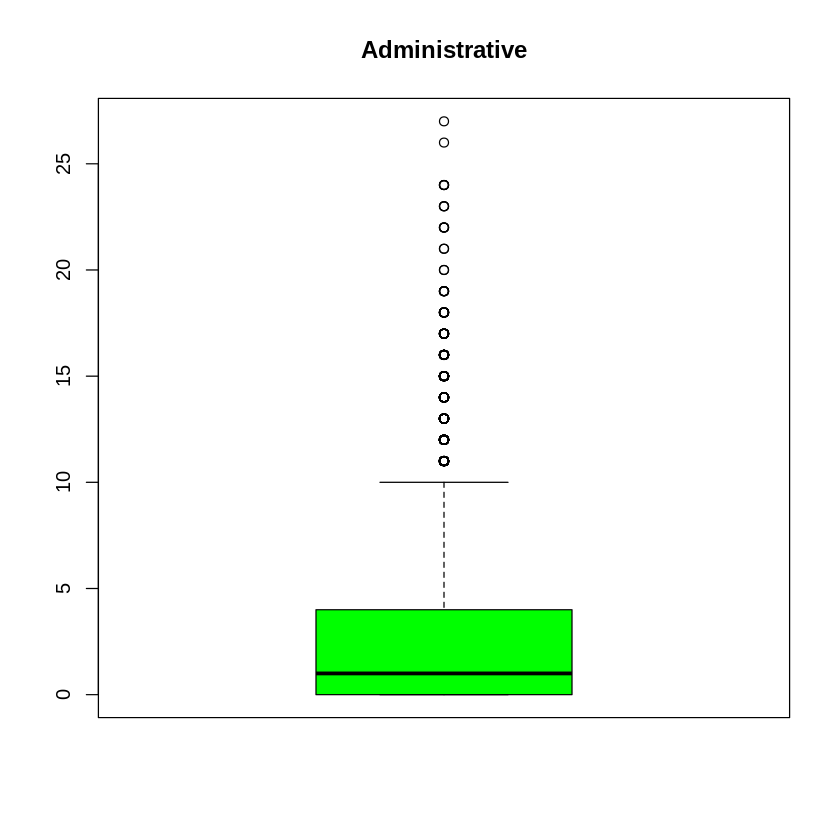

In [15]:
boxplot(engaged_shopers$Administrative,col='green', main="Administrative")

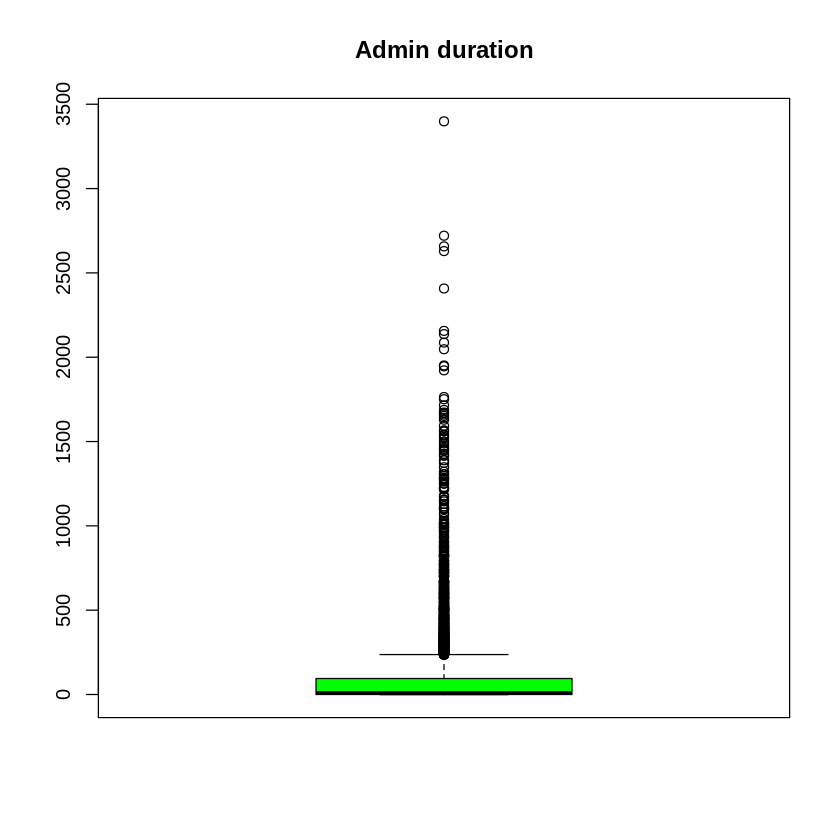

In [18]:
boxplot((engaged_shopers$`Administrative_Duration`), col='green', main="Admin duration")

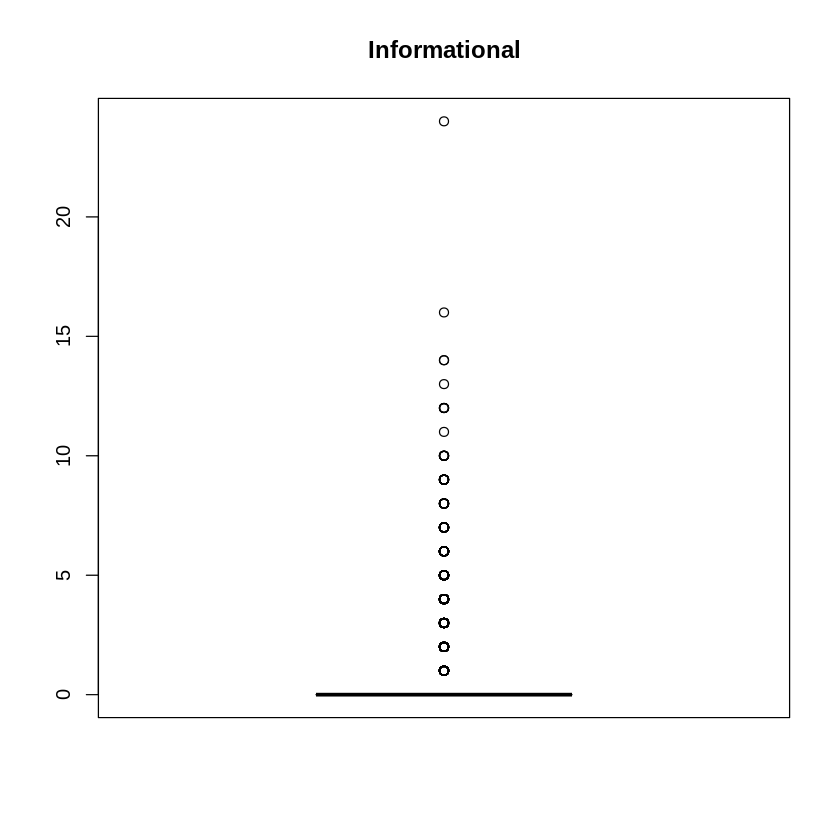

In [19]:
boxplot((engaged_shopers$`Informational`), col='green', main="Informational")

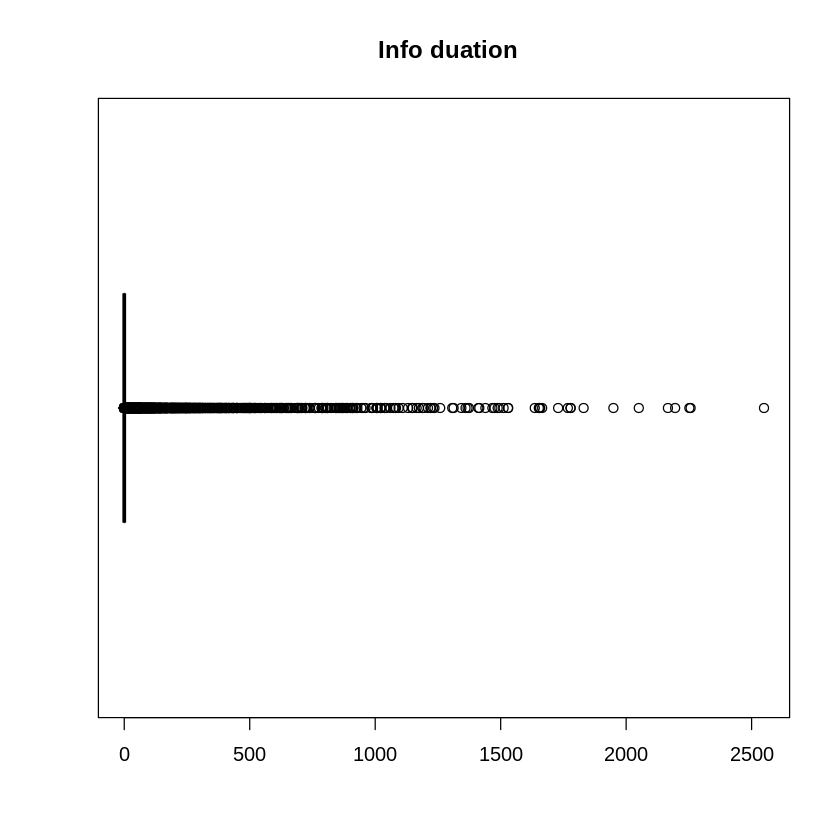

In [20]:

boxplot((engaged_shopers$`Informational_Duration`),horizontal=TRUE, col='blue', main=" Info duation")

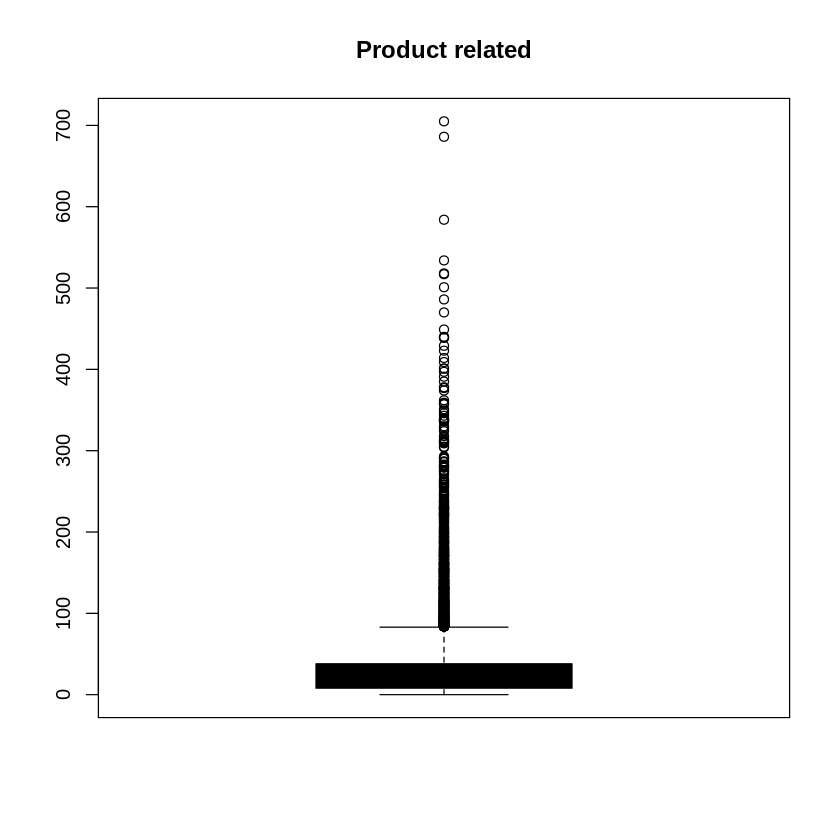

In [23]:
boxplot((engaged_shopers$`ProductRelated`),col='black', main="Product related")

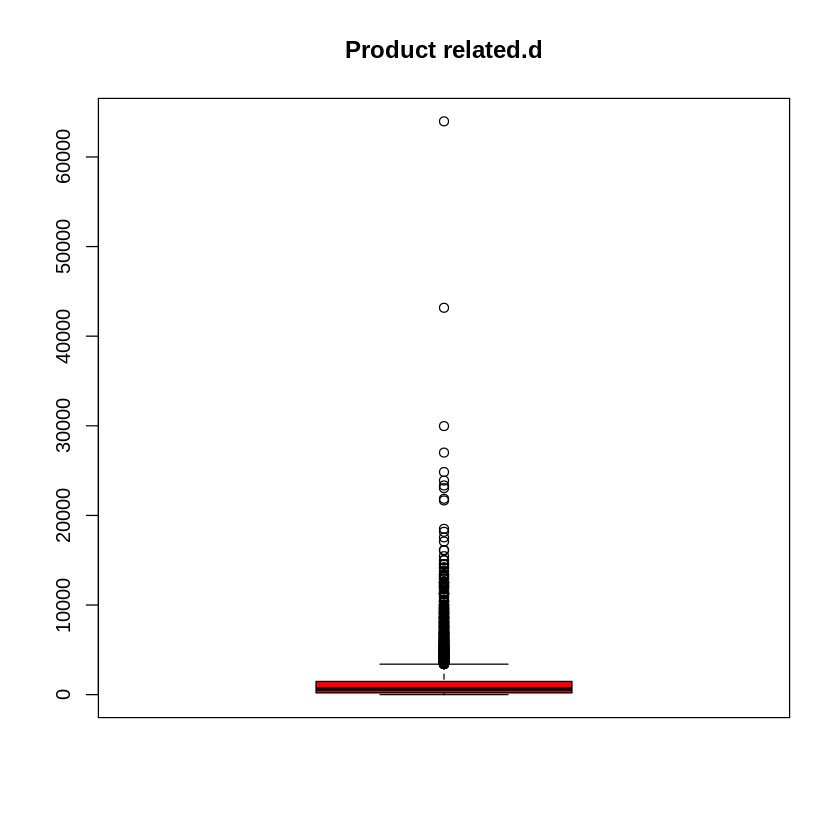

In [25]:
boxplot((engaged_shopers$`ProductRelated_Duration`),col='red', main="Product related.d")

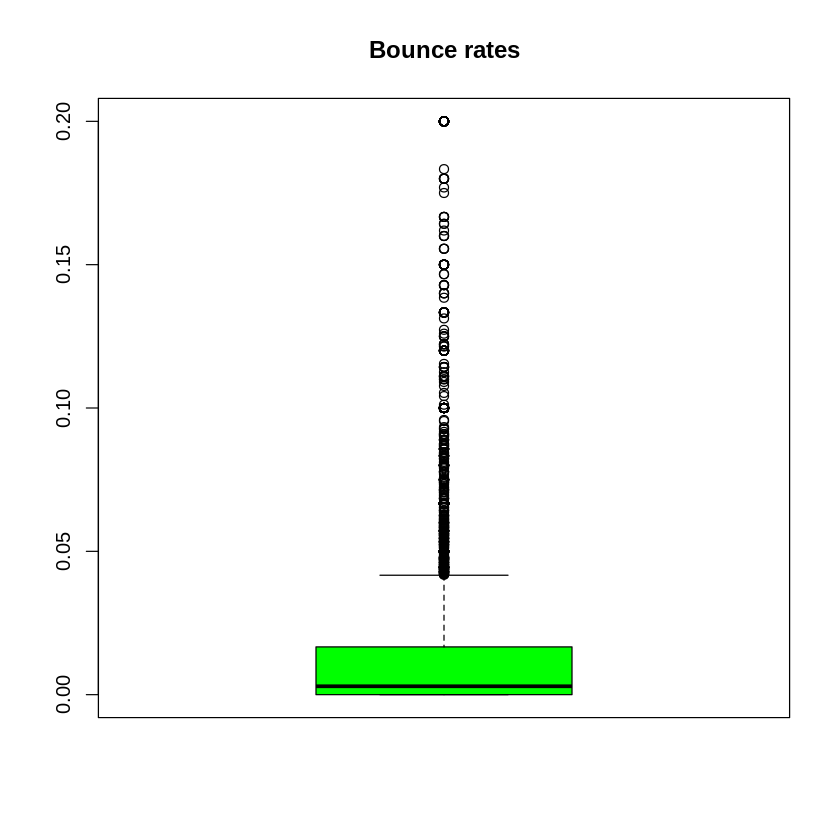

In [27]:

boxplot((engaged_shopers$`BounceRates`),col='green', main="Bounce rates")

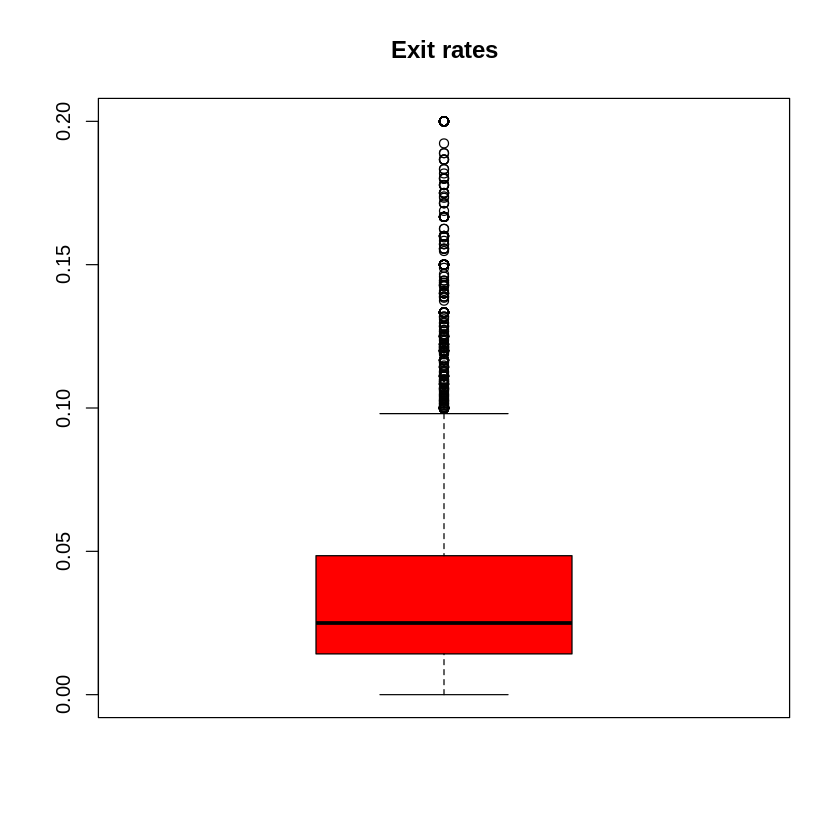

In [29]:

boxplot((engaged_shopers$`ExitRates`),col='red', main="Exit rates")

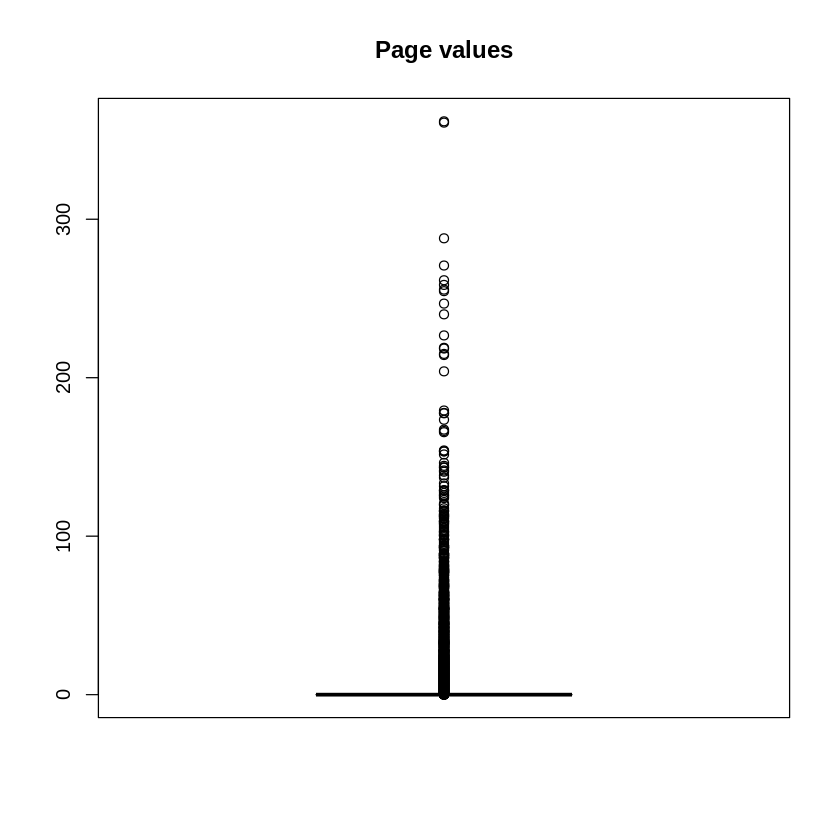

In [30]:

boxplot((engaged_shopers$PageValues),col='green', main="Page values")

# Perform Exploratory Data Analysis  (Univariate, Bivariate & Multivariate)

## Univariate Analysis

In [31]:
summary(engaged_shopers)

 Administrative  Administrative_Duration Informational    
 Min.   : 0.00   Min.   :  -1.00         Min.   : 0.0000  
 1st Qu.: 0.00   1st Qu.:   0.00         1st Qu.: 0.0000  
 Median : 1.00   Median :   9.00         Median : 0.0000  
 Mean   : 2.34   Mean   :  81.68         Mean   : 0.5088  
 3rd Qu.: 4.00   3rd Qu.:  94.75         3rd Qu.: 0.0000  
 Max.   :27.00   Max.   :3398.75         Max.   :24.0000  
                                                          
 Informational_Duration ProductRelated   ProductRelated_Duration
 Min.   :  -1.00        Min.   :  0.00   Min.   :   -1.0        
 1st Qu.:   0.00        1st Qu.:  8.00   1st Qu.:  193.6        
 Median :   0.00        Median : 18.00   Median :  609.5        
 Mean   :  34.84        Mean   : 32.06   Mean   : 1207.5        
 3rd Qu.:   0.00        3rd Qu.: 38.00   3rd Qu.: 1477.6        
 Max.   :2549.38        Max.   :705.00   Max.   :63973.5        
                                                                
  Bounce

The above isa summary of the statistics of numerical variables 

In the cases where the variable is catergorical the summary of the count of unique entries have been  listed 

We can also see again that from the summary we can tell that some of the numerical columns are catergorical in anature

## Bivariate Analysis

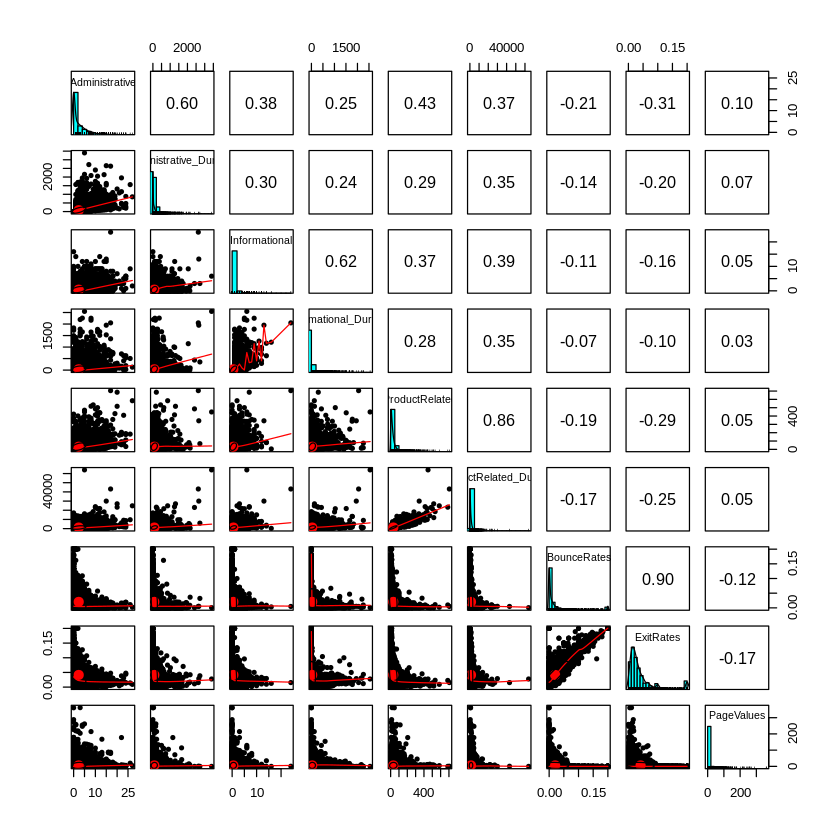

In [34]:
pairs.panels(engaged_shopers[,c(1:9)])

We can see strong relationships  with most being parabolic 

In [37]:
library(dplyr)
x <- round(cor(select_if(engaged_shopers, is.numeric)), 4)
res <- cor(x)
corr <- round(res,4)
print(corr)

                        Administrative Administrative_Duration Informational
Administrative                  1.0000                  0.8817        0.6620
Administrative_Duration         0.8817                  1.0000        0.5813
Informational                   0.6620                  0.5813        1.0000
Informational_Duration          0.5235                  0.4735        0.8828
ProductRelated                  0.7135                  0.5956        0.6521
ProductRelated_Duration         0.6947                  0.6183        0.6705
BounceRates                    -0.6841                 -0.5860       -0.5339
ExitRates                      -0.7358                 -0.6305       -0.5675
PageValues                      0.1552                  0.0996        0.0375
SpecialDay                     -0.3977                 -0.3767       -0.3355
OperatingSystems               -0.2505                 -0.2607       -0.2938
Browser                        -0.2535                 -0.2561       -0.3146

# Implement the Solution

# Challenge the Solution

# Follow up Questions